
#### **Retornos Discretos**

Há diferentes maneiras que o retorno pode ser representado.

__a) Retornos Brutos (_Gross Returns_)__

$R_{t+1}= \frac{P_{t+1}}{P_t}$

* ${P_t}$ : preço do ativo no início do período
* $P_{t+1}$ : preço do ativo no final do período
* $t$: período inicial

obs1: a notação do período pode mudar, em alguns materiais a fórmula o representa por  $\frac{P_{t}}{P_t-1}$ . O princípio é o mesmo, posterior no numerador e anterior no denominador

obs2:  Caso seja um ativo que pague dividendo, a fórmula será a seguinte:

$R_{t+1}= \frac{P_{t+1} + D_{t+1}}{P_t}$

obs3:  Essa fórmula assume que o preço do ativo pode ser medido, o que nem sempre é verdade, dado o caso de ativos ilíquidos (isso não será importante para o case e talvez não muito importante para o andar de seus estudos, apenas saiba disso) 

O Retorno Acumulado pode ser calculado pelo produto de uma série de retornos brutos, por exemplo:

$Rcum_{t+3} = R_{t+1} + R_{t+2} + R_{t+3}$



__b) Retornos Aritméticos (_Arithmetic Returns_) ou retornos simples (_“simple returns“_) ou retornos líquidos__

$r_{t+1}= R_{t+1} - 1$

* $r_{t+1}$ : retorno aritmético
* $ R_{t+1}$: retorno bruto

Nesse caso, o retorno acumulativo é calculado, por exemplo: 

$Rcum_{t+3} = (1-r_{t+1})*(1-r_{t+2})*(1-r_{t+3})$

Não há a propriedade aditiva entre os retornos  
$(1-r_{t+1})(1-r_{t+2})(1-r_{t+3})$ ≠ $1 + (r_{t+1}) (r_{t+2}) (r_{t+3})$

No entanto há propriedade aditiva entre ativos quando calculamos o retorno de um portfólio (veremos mais para frente). Como exemplo, em um portfólio com ativos igualmente balanceados __A__ e __B__, seu retorno será dado por

$r^{p}_{t+1} = 0.5r^{A}_{t+1} + 0.5r^{B}_{t+1} $

#### __Retornos logarítmicos__

$rlog_{t+1} =ln(\frac{P_{t+1}}{P_t})= ln(P_{t+1}) - ln(P_{t})  =ln(R_{t+1}) = ln(1+ r_{t+1})$

* $rlog$: retorno logarítmico 

Para transformar em retorno bruto, basta fazer a seguinte conta:

$R_{t+1}= exp({rlog}_{t+1})$

Para transformar em retorno aritmético, basta :

$r_{t+1}= 1 - exp({rlog}_{t+1})$

O retorno logarítmico acumulado é dado por:

$Rlncum_{t+3} = exp({rlog}_{t+1} + {rlog}_{t+2}+ {rlog}_{t+3}) = exp(rlog_{t+1})+ exp(rlog_{t+2})+ exp(rlog_{t+3})$

obs4: Retornos logarítmicos não se agregam entre ativos

$r^{p}_{t+1} = ln(0.5exp({rlog}^{A}_{t+1}) + 0.5exp({rlog}^{B}_{t+1})) $




#### __a)__ Calcule o retorno total (entre o valor final e o valor do começo), pelo formato discreto (simples) e logarítmico de uma ação de sua escolha
Recomenda-se ser a mesma ação da questão anterior

In [ ]:
import math

ticker = 'VALE3.SA'

start_date = '2018-01-01'
end_date = '2022-12-31'

data = yf.download(ticker, start=start_date, end=end_date)['Adj Close']

price_initial = data.iloc[0]
price_final = data.iloc[-1]

# Formato simples
total_return = (price_final / price_initial) - 1

print(f"Preço Inicial em {start_date}: R${price_initial:.2f}")
print(f"Preço Final em {end_date}: R${price_final:.2f}")
print(f"Retorno Total no Período: {total_return:.2%}",end='\n\n')

# Formato logarítmico
logarithmic_return = math.log(price_initial / price_final)

print(f"Preço Inicial em {start_date}: R${price_initial:.2f}")
print(f"Preço Final em {end_date}: R${price_final:.2f}")
print(f"Retorno Logarítmico no Período: {logarithmic_return:.2%}")

[*********************100%%**********************]  1 of 1 completed

Preço Inicial em 2018-01-01: R$26.18
Preço Final em 2022-12-31: R$80.01
Retorno Total no Período: 205.64%

Preço Inicial em 2018-01-01: R$26.18
Preço Final em 2022-12-31: R$80.01
Retorno Logarítmico no Período: -111.72%


#### __b)__ Construa um dataframe com os retornos diário ao longo de todo o período, pelo formato discreto (simples) e logarítmico da mesma ação

In [ ]:
vale3 = df

# Retorno diário
vale3['Retorno Diario'] = vale3['Adj Close'].pct_change() # Alteração percentual em relação ao período anterior

# Retorno logarítmico
vale3['Log Retorno'] = np.log(vale3['Adj Close'].shift(-1)/vale3['Adj Close'])

# Explicação da função shift:
# vale3['fechamento (t)'] = vale3['Adj Close']
# vale3['fechamento shiftado (t+1)'] = vale3['Adj Close'].shift(-1)
# retornos_df = vale3[['Retorno Diario','Log Retorno','fechamento (t)','fechamento shiftado (t+1)']]
# retornos_df

retornos_df = vale3[['Retorno Diario','Log Retorno']]
retornos_df


,Retorno Diario,Log Retorno
Date,,
2018-01-02,NaN,-0.006011
2018-01-03,-0.005993,0.004091
2018-01-04,0.004100,0.015489
2018-01-05,0.015610,0.021984
2018-01-08,0.022228,-0.003708
...,...,...
2022-12-23,0.006647,0.009110
2022-12-26,0.009152,0.023597
2022-12-27,0.023878,-0.002245


In [ ]:
retornos = px.line(retornos_df['Log Retorno'])

# Formatação do gráfico
retornos.update_layout(plot_bgcolor='rgba(0,0,0,0)',template='plotly_dark',paper_bgcolor='rgba(0,0,0,0)'
                 )
retornos.update_yaxes(title = 'Log retorno'
                 )
retornos.update_traces(line={'width': 1})
retornos.show()

#### __d)__ Uma forma de checarmos graficamente se os retornos seguem uma distribuição normal é fazendo o histograma dos log-retornos. Para as ações da Vale, e mais 3 de sua escolha, faça um histograma 

Dica: utilize a função do matplotlib da seguinte maneira __plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency', color='b')__

Não esqueça de considerar as datas entre "01/01/2018" e "31/12/2022"

[*********************100%%**********************]  1 of 1 completed


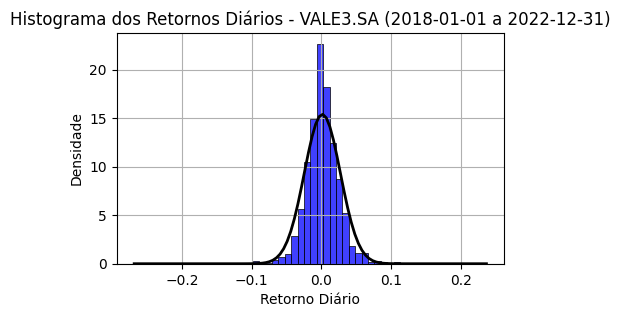

[*********************100%%**********************]  1 of 1 completed


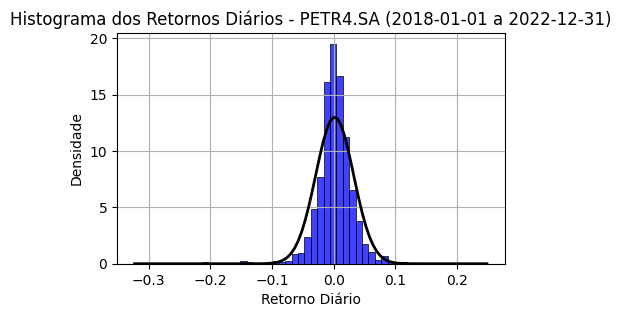

[*********************100%%**********************]  1 of 1 completed


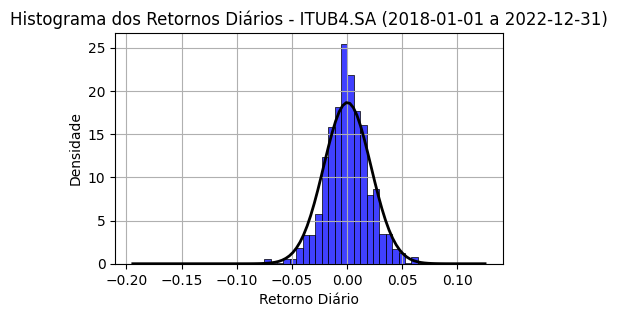

[*********************100%%**********************]  1 of 1 completed


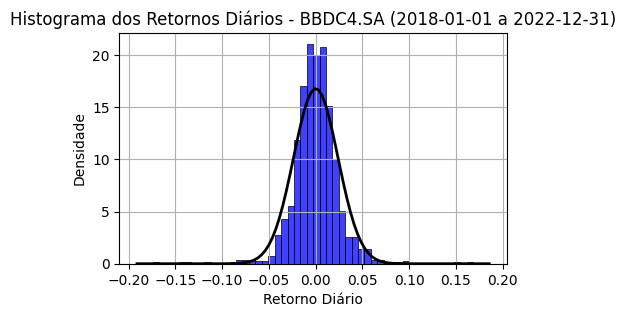

In [ ]:
from scipy.stats import norm

def plot_histogram_and_normal_curve(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date)
    data['Retorno Diario'] = data['Adj Close'].pct_change().dropna()
    retornos_diarios = data['Retorno Diario'].dropna()
    mean, std = norm.fit(retornos_diarios)
    
    # Plotagem do histograma
    plt.figure(figsize=(5, 3))
    sns.histplot(retornos_diarios, bins=50, kde=False, color='blue', stat='density')

    # Plotagem da normal
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    plt.plot(x, p, 'k', linewidth=2)
    
    # Formatação dos gráficos
    plt.title(f'Histograma dos Retornos Diários - {ticker} ({start_date} a {end_date})')
    plt.xlabel('Retorno Diário')
    plt.ylabel('Densidade')
    plt.grid(True)
    plt.show()

start_date = '2018-01-01'
end_date = '2022-12-31'

plot_histogram_and_normal_curve('VALE3.SA', start_date, end_date)
plot_histogram_and_normal_curve('PETR4.SA', start_date, end_date)
plot_histogram_and_normal_curve('ITUB4.SA', start_date, end_date)
plot_histogram_and_normal_curve('BBDC4.SA', start_date, end_date)

### Estatísticas
<img src = "https://www.meme-arsenal.com/memes/e67609cded2cb9c7f9f120ffc8a0e5ea.jpg" >

<p align='center'>
    "As estatísticas corretas nos deixam sempre uma falsa impressão" - Stanislaw Ponte Preta, pseudônimo do Jornalista Sérgio Porto (1923-1968)
</p>

<p align='center'>    
    "Usa-se a estatística como um homem bêbado usa um poste, mais para apoiar que para iluminar" - Andrew Lang (1844-1912)
</p>

<p align='center'>    
    "I can prove anything by statistics except the truth." - George Canning
</p>





Estatística é uma área extremamente ampla, cujas ferramentas são primordiais para as Finanças ao embasarem diversas teorias, conceitos e fórmulas. O conceito de __distribuição normal__ e desvios da normalidade, como __skewness__ e __kurtosis__, por exemplo, são aplicados aos retornos de investimentos e baseiam diversas teorias como: 

* Teoria das Carteiras 
* Modelo de precificação dos ativos (Capital Asset Pricing Model - CAPM)
* Hipótese dos Mercados Eficientes (Efficient Market Hypotesis - EMH)
* Precificação de Opções

Além disso, modelos estatísticos mais avançados são a base do Aprendizado de Máquinas (ou Aprendizado Estatístico), o qual encontra cada vez mais espaço nas finanças e possibilita estratégias de investimentos sistemáticos. Encontraremos alguns de suas apliações nos próximos desafios, por agora iremos focar em testar a normalidade dos retornos. 

obs: recomendamos utilizarem os pacotes  __statsmodels.api__ e __scipy.stats__ 

#### __e)__ Calcule um conjunto de estatísticas (recomenda-se fazer/usar uma função), contendo o tamanho da amostra, mínimo, máximo, média, desvio padrão, skew e kurtosis; para as mesmas 4 ações. Compare os valores

In [ ]:
import scipy.stats as stats

start_date = '2018-01-01'
end_date = '2022-12-31'
tickers = ['VALE3.SA', 'PETR4.SA', 'ITUB4.SA', 'BBDC4.SA']
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

# Retornos simples diários
returns = data.pct_change().dropna()

# Função das estatísticas
def calc_stats(series):
    normal = stats.normaltest(series)
    a, b = normal

    stats_dict = {
        'count': series.count(),
        'min': series.min(),
        'max': series.max(),
        'mean': series.mean(),
        'std': series.std(),
        'skew': stats.skew(series),
        'kurtosis': stats.kurtosis(series),
        'normaltest': normal,
        'valor -p': str(b)
    }
    return stats_dict

# Estatísticas para cada ação
stats_df = pd.DataFrame({ticker: calc_stats(returns[ticker]) for ticker in tickers})

stats_df

# Min: Petrobras (PETR4) teve o menor retorno mínimo, indicando maior queda num único dia.
# Max: Petrobras (PETR4) teve o maior retorno máximo, indicando maior alta num único dia.
# Média: Petrobras (PETR4) teve o maior retorno médio, indicando o retorno superior ao longo do tempo (vale ressaltar que VALE3 está próximo)
# DP: Petrobras (PETR4) teve o maior DP, i.e em finanças maior volatilidade.

[*********************100%%**********************]  4 of 4 completed


,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA
count,1238,1238,1238,1238
min,-0.245592,-0.296978,-0.179643,-0.173843
max,0.213579,0.222222,0.110593,0.168669
mean,0.00124,0.001408,0.000273,0.000237
std,0.025893,0.030666,0.02138,0.023745
skew,-0.096328,-1.073901,-0.361489,-0.089837
kurtosis,13.846549,14.903582,5.87658,8.301992
normaltest,"(271.98876863687065, 8.67739406966291e-60)","(445.25506324227, 2.0610640926948775e-97)","(187.57769375408878, 1.853622691123141e-41)","(205.52726301473166, 2.3459669852908874e-45)"
valor -p,8.67739406966291e-60,2.0610640926948775e-97,1.853622691123141e-41,2.3459669852908874e-45


#### __f)__ Faça testes estatísticos de signficância estatística para as ações que escolheu anteriormente. Eles podem ser obtidos pelas funções do scipy.stats:

* skewtest()
* kurtosistest()
* normaltest()

_Skewness is a measure of symmetry, or more precisely, the lack of symmetry. A distribution, or data set, is symmetric if it looks the same to the left and right of the center point._

_Kurtosis is a measure of whether the data are heavy-tailed or light-tailed relative to a normal distribution. That is, data sets with high kurtosis tend to have heavy tails, or outliers. Data sets with low kurtosis tend to have light tails, or lack of outliers. A uniform distribution would be the extreme case._

obs: usualmente, usa-se um intervalo de confiança de 95% para a significância estatística; assim, os retornos __não__ são normalmente distribuídos caso o valor-p for abaixo de 0.05.


Responda, então, se os retornos das ações escolhidas são normalmente distribuídos.

In [ ]:
stats_df_testes = stats_df[-4:]
stats_df_testes

# Skew (assimetria): Todas apresentam assimetria negativa, assim, a probabilidade maior de grandes perdas em comparação com os ganhos - sendo mais acentuado na Petrobras.
# Kurtosis: todas são altas (maiores do que 3 que é dist normal), isso indica que há caudas mais "densas" (mais outliers), em finanças indica maior risco.
# Normal: Como o valor de -p é acima de 0.05 os retornos são normalmente distribuídos

,VALE3.SA,PETR4.SA,ITUB4.SA,BBDC4.SA
skew,-0.096328,-1.073901,-0.361489,-0.089837
kurtosis,13.846549,14.903582,5.87658,8.301992
normaltest,"(271.98876863687065, 8.67739406966291e-60)","(445.25506324227, 2.0610640926948775e-97)","(187.57769375408878, 1.853622691123141e-41)","(205.52726301473166, 2.3459669852908874e-45)"
valor -p,8.67739406966291e-60,2.0610640926948775e-97,1.853622691123141e-41,2.3459669852908874e-45
